In [ ]:
# In this notebook, we will evaluate the results of the synthetic dataset training runs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import json

from scipy.spatial.distance import directed_hausdorff

from src.interface_representation.interface_types import InterfaceType
from eval_utils import *

base_output_dir = pathlib.Path('./../../output/lassen')
files = list(base_output_dir.glob('interfacial_ae_v24_*'))

print(len(files))



In [2]:
print(files_mu25)

[PosixPath('/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_03_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/TANH_EPSILON00078125_seed0'), PosixPath('/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_02_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/HEAVISIDE_seed0'), PosixPath('/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_00_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/SIGNED_DISTANCE_EXACT_seed0'), PosixPath('/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_01_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/SIGNED_DISTANCE_APPROXIMATE_seed0'), PosixPath('/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_08_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_2

In [3]:
mus = [1.0, 2.0, 2.5]

def read_loss_curve_from_file(outdir):
    loss_path = outdir / 'loss_history.json'
    with open(loss_path) as f:
        loss_curve = json.load(f)
    return loss_curve

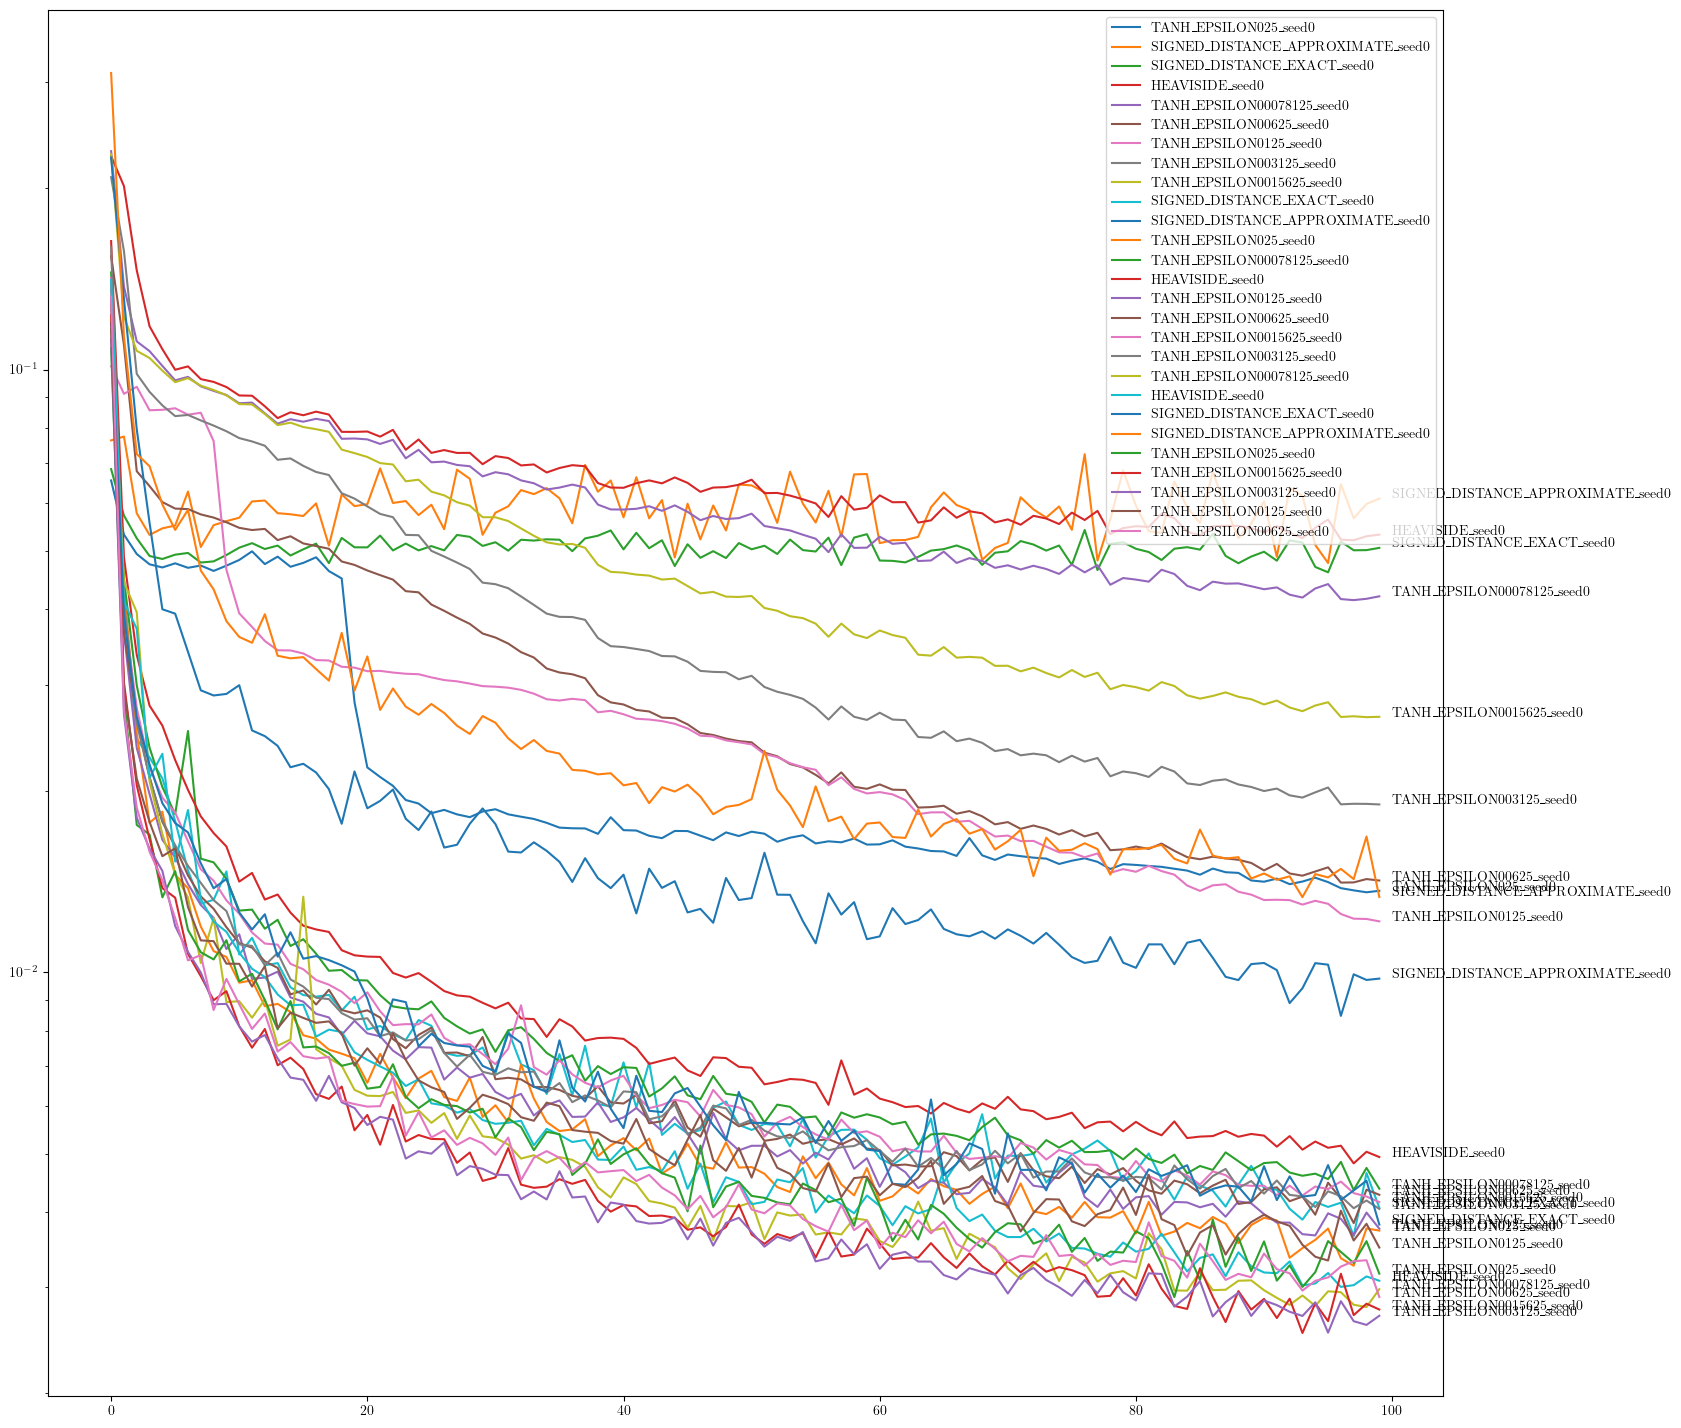

In [4]:
import itertools

# Compare all the loss curves on one axis


name_to_loss = {}

for f in itertools.chain(files_mu1, files_mu2, files_mu25):
    name_to_loss[f] = read_loss_curve_from_file(f)

fig, ax = plt.subplots(figsize=(18, 18))
loss_component = 'Total'
for f, loss in name_to_loss.items():
    ax.plot(loss[loss_component], label=f.name)

    # Annotate name on the end of the curve
    ax.text(len(loss[loss_component]), loss[loss_component][-1], f.name)
ax.legend()
ax.set_yscale('log')
plt.show()



In [6]:
# Functions to group the data by interface type and epsilon

def extract_interface_type(outdir):
    
    final_part = '_'.join(outdir.stem.split('_')[:-1])

    str_to_type = {
        'TANH_EPSILON00078125': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON0015625': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON003125': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON00625': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON0125': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON025': InterfaceType.TANH_EPSILON,
        'HEAVISIDE': InterfaceType.HEAVISIDE,
        'SIGNED_DISTANCE_EXACT': InterfaceType.SIGNED_DISTANCE_EXACT,
        'SIGNED_DISTANCE_APPROXIMATE': InterfaceType.SIGNED_DISTANCE_APPROXIMATE,
    }

    return str_to_type[final_part]

def extract_epsilon(outdir):
    final_part = '_'.join(outdir.stem.split('_')[:-1])
    
    str_to_epsilon = {
        'TANH_EPSILON00078125': 0.0078125,
        'TANH_EPSILON0015625': 0.015625,
        'TANH_EPSILON003125': 0.03125,
        'TANH_EPSILON00625': 0.0625,
        'TANH_EPSILON0125': 0.125,
        'TANH_EPSILON025': 0.25,
        'HEAVISIDE': None,
        'SIGNED_DISTANCE_EXACT': None,
        'SIGNED_DISTANCE_APPROXIMATE': None,
    }
    
    return str_to_epsilon[final_part]

def get_modal_path(outdir):
    return outdir / 'model-100.pt'


def get_dataset_path(mu, interfacetype, epsilon):
    if interfacetype == InterfaceType.TANH_EPSILON:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/TANH_EPSILON{epsilon}')
    elif interfacetype == InterfaceType.HEAVISIDE:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/HEAVISIDE')
    elif interfacetype == InterfaceType.SIGNED_DISTANCE_EXACT:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/SIGNED_DISTANCE_EXACT')
    elif interfacetype == InterfaceType.SIGNED_DISTANCE_APPROXIMATE:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/SIGNED_DISTANCE_APPROXIMATE')
    else:
        raise ValueError('Unknown interface type')
    
import json
    
    

In [7]:
outdir_to_params = {}

for mu, files in zip(mus, [files_mu1, files_mu2, files_mu25]):
    
    for outdir in files:
        interfacetype = extract_interface_type(outdir)
        epsilon = extract_epsilon(outdir)
        model_path = get_modal_path(outdir)
        dataset_path = get_dataset_path(mu, interfacetype, epsilon)
        
        assert model_path.exists()
        assert dataset_path.exists(), f'{dataset_path} does not exist'
    
        params = {
            'mu': mu,
            'interface_type': interfacetype,
            'epsilon': epsilon,
            'model_path': model_path,
            'dataset_path': dataset_path
        }
        
        outdir_to_params[outdir] = params
    
print(outdir_to_params)

{PosixPath('/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_08_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON025_seed0'): {'mu': 1.0, 'interface_type': <InterfaceType.TANH_EPSILON: 1>, 'epsilon': 0.25, 'model_path': PosixPath('/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_08_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON025_seed0/model-100.pt'), 'dataset_path': PosixPath('/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_1.00/TANH_EPSILON0.25')}, PosixPath('/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_01_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/SIGNED_DISTANCE_APPROXIMATE_seed0'): {'mu': 1.0, 'interface_type': <InterfaceType.SIGNED_DISTANCE_APPROXIMATE: 3>, 'epsilon': None, 'model_path

In [8]:
import torch
from tqdm import tqdm

# Functions to load model, load dataset, and run inference

from src.datasets.volumetric_datasets import VolumeDatasetInMemory
from conv_ae_3d.models.baseline_model import ConvAutoencoderBaseline

dim = 32
dim_mults = [1, 2, 4, 8, 8, 8]
block_type = 1
z_channels = 4

def load_model(model_path):
    model = ConvAutoencoderBaseline(
        dim=dim,
        dim_mults=dim_mults,
        channels=1,
        z_channels=z_channels,
        block_type=block_type
    )
    
    device = torch.device('mps' if torch.mps.is_available() else 'cpu')
    print(device)
    
    data = torch.load(str(model_path),
                      map_location=device)

    model.load_state_dict(data['model'])
    model.to(device)
    
    return model


def load_dataset(dataset_path):
    return VolumeDatasetInMemory(
        data_dir=dataset_path,
        split='val',
    )


def run_inference(dataset, model):
    gts = []
    preds = []
    
    device = torch.device('mps' if torch.mps.is_available() else 'cpu')
    with torch.no_grad():
        for x in tqdm(dataset):
            x = x.unsqueeze(0)
            x = x.to(device)
            y = model(x)
            
            gts.append(x.cpu().numpy().squeeze())
            preds.append(y.cpu().numpy().squeeze())
            
    return gts, preds
            
            


In [9]:
# Run inference for all

for outdir, params in outdir_to_params.items():
    print(outdir)
    outfile = outdir / 'inference.npz'
    
    dataset = load_dataset(params['dataset_path'])
    model = load_model(params['model_path'])
    gts, preds = run_inference(dataset, model)
    
    # Save outdir, preds, params, gt to disk, ready to be reloaded at evaluation time!
    
    np.savez_compressed(outfile, gts=gts, preds=preds, **params)

/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_08_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON025_seed0
mps


/var/folders/6y/1gfy1yb96_59763zctgly20h0000gn/T/ipykernel_45416/4077193763.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(str(model_path),
  0%|    

/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_01_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/SIGNED_DISTANCE_APPROXIMATE_seed0
mps


100%|██████████| 500/500 [08:07<00:00,  1.03it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_00_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/SIGNED_DISTANCE_EXACT_seed0
mps


100%|██████████| 500/500 [08:02<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_02_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/HEAVISIDE_seed0
mps


100%|██████████| 500/500 [08:02<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_03_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON00078125_seed0
mps


100%|██████████| 500/500 [08:00<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_06_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON00625_seed0
mps


100%|██████████| 500/500 [08:00<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_07_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON0125_seed0
mps


100%|██████████| 500/500 [08:01<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_05_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON003125_seed0
mps


100%|██████████| 500/500 [08:08<00:00,  1.02it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_04_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON0015625_seed0
mps


100%|██████████| 500/500 [08:12<00:00,  1.01it/s]


../../output/lassen/interfacial_ae_v21_run_00_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_200/SIGNED_DISTANCE_EXACT_seed0
mps


100%|██████████| 500/500 [08:12<00:00,  1.02it/s]


../../output/lassen/interfacial_ae_v21_run_01_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_200/SIGNED_DISTANCE_APPROXIMATE_seed0
mps


100%|██████████| 500/500 [08:08<00:00,  1.02it/s]


../../output/lassen/interfacial_ae_v21_run_08_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_200/TANH_EPSILON025_seed0
mps


100%|██████████| 500/500 [07:59<00:00,  1.04it/s]


../../output/lassen/interfacial_ae_v21_run_03_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_200/TANH_EPSILON00078125_seed0
mps


100%|██████████| 500/500 [08:00<00:00,  1.04it/s]


../../output/lassen/interfacial_ae_v21_run_02_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_200/HEAVISIDE_seed0
mps


100%|██████████| 500/500 [08:00<00:00,  1.04it/s]


../../output/lassen/interfacial_ae_v21_run_07_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_200/TANH_EPSILON0125_seed0
mps


100%|██████████| 500/500 [08:00<00:00,  1.04it/s]


../../output/lassen/interfacial_ae_v21_run_06_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_200/TANH_EPSILON00625_seed0
mps


100%|██████████| 500/500 [08:00<00:00,  1.04it/s]


../../output/lassen/interfacial_ae_v21_run_04_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_200/TANH_EPSILON0015625_seed0
mps


100%|██████████| 500/500 [08:01<00:00,  1.04it/s]


../../output/lassen/interfacial_ae_v21_run_05_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_200/TANH_EPSILON003125_seed0
mps


100%|██████████| 500/500 [08:00<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_03_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/TANH_EPSILON00078125_seed0
mps


100%|██████████| 500/500 [08:00<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_02_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/HEAVISIDE_seed0
mps


100%|██████████| 500/500 [08:00<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_00_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/SIGNED_DISTANCE_EXACT_seed0
mps


100%|██████████| 500/500 [08:01<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_01_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/SIGNED_DISTANCE_APPROXIMATE_seed0
mps


100%|██████████| 500/500 [08:01<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_08_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/TANH_EPSILON025_seed0
mps


100%|██████████| 500/500 [08:01<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_04_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/TANH_EPSILON0015625_seed0
mps


100%|██████████| 500/500 [08:01<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_05_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/TANH_EPSILON003125_seed0
mps


100%|██████████| 500/500 [08:02<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_07_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/TANH_EPSILON0125_seed0
mps


100%|██████████| 500/500 [08:01<00:00,  1.04it/s]


/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v22_run_06_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_250/TANH_EPSILON00625_seed0
mps


100%|██████████| 500/500 [08:01<00:00,  1.04it/s]


In [10]:



def compute_phi_sharp_from_tanh(phi):
    return np.heaviside(phi - 0.5, 1)


def compute_phi_sharp_from_sdf(psi):
    return np.heaviside(-psi, 1)


def dice_coefficient(gt_patch, pred_patch, level: float = 0.5):
    """Returns the dice coefficient of foreground region, obtained by thresholding the images at level
    """
    gt_patch = gt_patch > level
    pred_patch = pred_patch > level
    intersection = np.sum(gt_patch * pred_patch)
    union = np.sum(gt_patch) + np.sum(pred_patch)
    return 2 * intersection / union


def hausdorff_distance(gt_patch, pred_patch, level: float = 0.5):
    """Returns the Hausdorff distance of the foreground region, obtained by thresholding the images at level

    Note:
        The distance is in units of voxels, assumes isotropic voxels

    Args:
        gt_patch: Ground truth patch
        pred_patch: Predicted patch
        level: Threshold level
        max_num_points: Maximum number of points to use in the distance calculation (for speed purposes)
    """
    gt_patch = gt_patch > level
    pred_patch = pred_patch > level

    gt_indices = np.argwhere(gt_patch) * 1 / 64
    pred_indices = np.argwhere(pred_patch) * 1 / 64

    if len(gt_indices) == 0 or len(pred_indices) == 0:
        return np.nan

    h_1 = directed_hausdorff(gt_indices, pred_indices)[0]
    h_2 = directed_hausdorff(pred_indices, gt_indices)[0]
    return max(h_1, h_2)


def get_phi_sharp(arr, interfacetype):
    if interfacetype == InterfaceType.TANH_EPSILON:
        return compute_phi_sharp_from_tanh(arr)
    elif (interfacetype == InterfaceType.SIGNED_DISTANCE_EXACT) or (interfacetype == InterfaceType.SIGNED_DISTANCE_APPROXIMATE):
        return compute_phi_sharp_from_sdf(arr)
    elif interfacetype == InterfaceType.HEAVISIDE:
        return compute_phi_sharp_from_tanh(arr)
    else:
        raise ValueError('Unknown interface type')


def get_phi_sharp_pred_and_gt(pred, gt, interface_type):
    if interface_type == InterfaceType.TANH_EPSILON:
        pred = compute_phi_sharp_from_tanh(pred)
        gt = compute_phi_sharp_from_tanh(gt)
    elif (interface_type == InterfaceType.SIGNED_DISTANCE_EXACT) or (interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE):
        pred = compute_phi_sharp_from_sdf(pred)
        gt = compute_phi_sharp_from_sdf(gt)
    elif interface_type == InterfaceType.HEAVISIDE:
        pred = compute_phi_sharp_from_tanh(pred)
        gt = compute_phi_sharp_from_tanh(gt)
    else:
        raise ValueError('Unknown interface type')
    return pred, gt


In [11]:
# Go over each file, and load predictions, compute metrics from each volume

outdir_to_metrics = {}

for outdir, params in outdir_to_params.items():
    print(outdir)
    outfile = outdir / 'inference.npz'
    data = np.load(outfile)
    
    gts = data['gts']
    preds = data['preds']
    
    # Convert to sharp interface
    interfacetype = params['interface_type']
    
    # Compute metrics
    # 2. Dice coefficient
    
    dices = []
    
    for gt, pred in zip(gts, preds):
        gt = get_phi_sharp(gt, interfacetype)
        pred = get_phi_sharp(pred, interfacetype)
        
        dice = dice_coefficient(gt, pred)
        dices.append(dice)
        
    print(np.mean(dices))
        
    outdir_to_metrics[outdir] = {
        'Dice': dices
    }
    

/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_08_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON025_seed0
0.7149067436355155
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_01_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/SIGNED_DISTANCE_APPROXIMATE_seed0
0.0
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_00_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/SIGNED_DISTANCE_EXACT_seed0
0.0
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_02_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/HEAVISIDE_seed0
0.8413540696756071
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_03_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON00078125_see

In [12]:
# Add hausforff distance to the metrics

for outdir, params in outdir_to_params.items():
    print(outdir)
    outfile = outdir / 'inference.npz'
    data = np.load(outfile)
    
    gts = data['gts']
    preds = data['preds']
    
    # Convert to sharp interface
    interfacetype = params['interface_type']
    
    # Compute metrics
    # 3. Hausdorff distance
    
    hds = []
    
    for gt, pred in zip(gts, preds):
        gt = get_phi_sharp(gt, interfacetype)
        pred = get_phi_sharp(pred, interfacetype)
        
        hd = hausdorff_distance(gt, pred)
        hds.append(hd)
        
    outdir_to_metrics[outdir]['Hausdorff'] = hds

/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_08_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON025_seed0
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_01_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/SIGNED_DISTANCE_APPROXIMATE_seed0
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_00_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/SIGNED_DISTANCE_EXACT_seed0
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_02_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/HEAVISIDE_seed0
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_03_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON00078125_seed0
/Users/murray/Projects/multphase_flow_encod

KeyboardInterrupt: 

In [31]:
# Add gts and preds to outdir_to_metrics without recalculating gts
for outdir, params in outdir_to_params.items():
    print(outdir)
    outfile = outdir / 'inference.npz'
    data = np.load(outfile)

    gts = data['gts']
    preds = data['preds']

    if outdir not in outdir_to_metrics:
        outdir_to_metrics[outdir] = {}

    outdir_to_metrics[outdir]['gts'] = gts
    outdir_to_metrics[outdir]['preds'] = preds

/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_08_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON025_seed0
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_01_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/SIGNED_DISTANCE_APPROXIMATE_seed0
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_00_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/SIGNED_DISTANCE_EXACT_seed0
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_02_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/HEAVISIDE_seed0
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/output/lassen/interfacial_ae_v20_run_03_datadir/usr/workspace/cutforth1/datamfae/spheres_mu_100/TANH_EPSILON00078125_seed0
/Users/murray/Projects/multphase_flow_encod

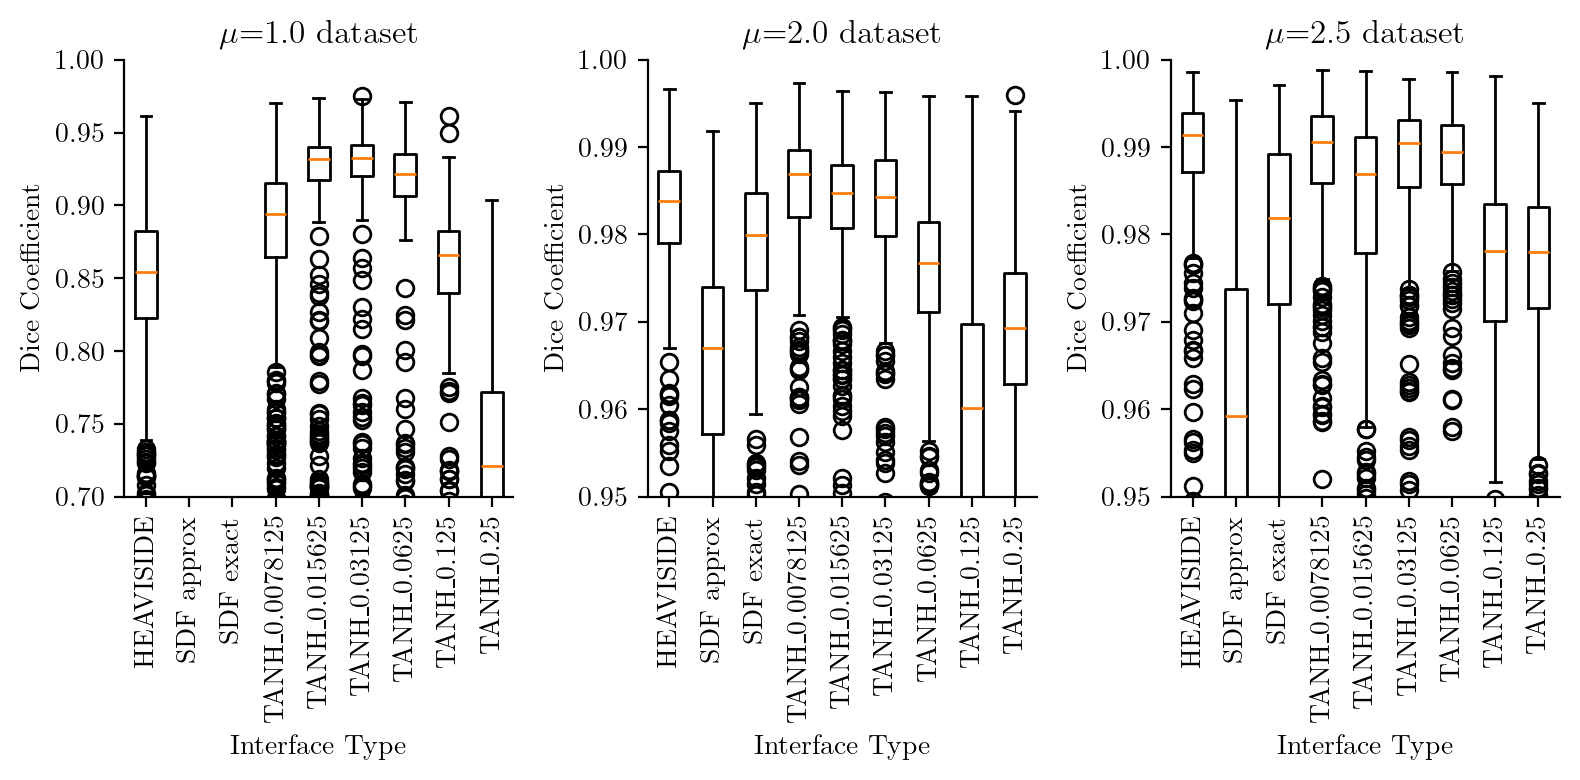

In [29]:
import matplotlib.pyplot as plt

# Group data by mu value
mu_to_data = {mu: {} for mu in mus}

for outdir, params in outdir_to_params.items():
    mu = params['mu']
    interface_type = params['interface_type']
    epsilon = params['epsilon']
    dice_scores = outdir_to_metrics[outdir]['Dice']
    
    if interface_type == InterfaceType.TANH_EPSILON:
        label = f'TANH_{epsilon}'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT:
        label = 'SDF exact'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE:
        label = 'SDF approx'
    else:
        label = interface_type.name
    
    if label not in mu_to_data[mu]:
        mu_to_data[mu][label] = []
    
    mu_to_data[mu][label].extend(dice_scores)
    
# Sort labels by interface type
for mu in mu_to_data:
    mu_to_data[mu] = dict(sorted(mu_to_data[mu].items(), key=lambda item: item[0]))

# Sort labels by epsilon value
for mu in mu_to_data:
    mu_to_data[mu] = dict(sorted(mu_to_data[mu].items(), key=lambda item: float(item[0].split('_')[-1]) if 'TANH' in item[0] else 0))
    
# Create box plots
fig, axs = plt.subplots(1, len(mus), figsize=(8, 4), dpi=200)

for i, mu in enumerate(mus):
    data = [mu_to_data[mu][label] for label in mu_to_data[mu]]
    labels = list(mu_to_data[mu].keys())
    axs[i].boxplot(data, tick_labels=labels)
    axs[i].set_title(f'$\\mu$={mu} dataset')
    axs[i].set_xlabel('Interface Type')
    axs[i].set_ylabel('Dice Coefficient')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].tick_params(axis='x', rotation=90)
    
axs[0].set_ylim(0.7, 1)
axs[1].set_ylim(0.95, 1)
axs[2].set_ylim(0.95, 1)

plt.tight_layout()
plt.show()

In [38]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import label

# Function to compute droplet PDF
def compute_droplet_pdf(arr):
    labeled_arr, num_labels = label(arr)
    sizes = np.bincount(labeled_arr.ravel())
    return sizes[1:]

# Group PDF data by interface type, epsilon, and mu value

interface_to_epsilon_to_mu_data = {}

for interface in InterfaceType:
    try:
        epsilons = sorted(set(params['epsilon'] for params in outdir_to_params.values() if params['interface_type'] == interface))
    except:
        epsilons = [None]
    interface_to_epsilon_to_mu_data[interface] = {epsilon: {mu: {'gt': [], 'pred': []} for mu in mus} for epsilon in epsilons}

print(interface_to_epsilon_to_mu_data)

for outdir, params in outdir_to_params.items():
    mu = params['mu']
    epsilon = params['epsilon']
    interface_type = params['interface_type']
    gts = outdir_to_metrics[outdir]['gts']
    preds = outdir_to_metrics[outdir]['preds']
    
    for gt, pred in zip(gts, preds):
        gt, pred = get_phi_sharp_pred_and_gt(pred, gt, interface_type)
        interface_to_epsilon_to_mu_data[interface_type][epsilon][mu]['gt'].extend(compute_droplet_pdf(gt))
        interface_to_epsilon_to_mu_data[interface_type][epsilon][mu]['pred'].extend(compute_droplet_pdf(pred))


{<InterfaceType.TANH_EPSILON: 1>: {0.0078125: {1.0: {'gt': [], 'pred': []}, 2.0: {'gt': [], 'pred': []}, 2.5: {'gt': [], 'pred': []}}, 0.015625: {1.0: {'gt': [], 'pred': []}, 2.0: {'gt': [], 'pred': []}, 2.5: {'gt': [], 'pred': []}}, 0.03125: {1.0: {'gt': [], 'pred': []}, 2.0: {'gt': [], 'pred': []}, 2.5: {'gt': [], 'pred': []}}, 0.0625: {1.0: {'gt': [], 'pred': []}, 2.0: {'gt': [], 'pred': []}, 2.5: {'gt': [], 'pred': []}}, 0.125: {1.0: {'gt': [], 'pred': []}, 2.0: {'gt': [], 'pred': []}, 2.5: {'gt': [], 'pred': []}}, 0.25: {1.0: {'gt': [], 'pred': []}, 2.0: {'gt': [], 'pred': []}, 2.5: {'gt': [], 'pred': []}}}, <InterfaceType.SIGNED_DISTANCE_EXACT: 2>: {None: {1.0: {'gt': [], 'pred': []}, 2.0: {'gt': [], 'pred': []}, 2.5: {'gt': [], 'pred': []}}}, <InterfaceType.SIGNED_DISTANCE_APPROXIMATE: 3>: {None: {1.0: {'gt': [], 'pred': []}, 2.0: {'gt': [], 'pred': []}, 2.5: {'gt': [], 'pred': []}}}, <InterfaceType.HEAVISIDE: 4>: {None: {1.0: {'gt': [], 'pred': []}, 2.0: {'gt': [], 'pred': []},

In [42]:
def get_label(interfacetype, epsilon) -> str:
    if interfacetype == InterfaceType.TANH_EPSILON:
        return f'TANH_{epsilon}'
    elif interfacetype == InterfaceType.SIGNED_DISTANCE_EXACT:
        return 'SDF exact'
    elif interfacetype == InterfaceType.SIGNED_DISTANCE_APPROXIMATE:
        return 'SDF approx'
    elif interfacetype == InterfaceType.HEAVISIDE:
        return 'Heaviside'
    else:
        raise ValueError('Unknown interface type')
    
# Now change interface_to_epsilon_to_mu_data to label_to_mu_data

label_to_mu_data = {}

for interface, epsilon_to_mu_data in interface_to_epsilon_to_mu_data.items():
    for epsilon, mu_data in epsilon_to_mu_data.items():
        label = get_label(interface, epsilon)
        print(label)
        
        if label not in label_to_mu_data:
            label_to_mu_data[label] = {mu: {'gt': [], 'pred': []} for mu in mus}
        
        for mu in mus:
            label_to_mu_data[label][mu]['gt'].extend(mu_data[mu]['gt'])
            label_to_mu_data[label][mu]['pred'].extend(mu_data[mu]['pred'])

TANH_0.0078125
TANH_0.015625
TANH_0.03125
TANH_0.0625
TANH_0.125
TANH_0.25
SDF exact
SDF approx
Heaviside


TANH_0.0078125 1.0 15887 48512
TANH_0.0078125 2.0 3573 3595
TANH_0.0078125 2.5 951 953
TANH_0.015625 1.0 35857 48503
TANH_0.015625 2.0 3560 3594
TANH_0.015625 2.5 946 953
TANH_0.03125 1.0 43234 48491
TANH_0.03125 2.0 3571 3594
TANH_0.03125 2.5 954 953
TANH_0.0625 1.0 42856 48453
TANH_0.0625 2.0 3621 3594
TANH_0.0625 2.5 957 953
TANH_0.125 1.0 35461 48395
TANH_0.125 2.0 3350 3593
TANH_0.125 2.5 951 953
TANH_0.25 1.0 15804 48252
TANH_0.25 2.0 3636 3591
TANH_0.25 2.5 941 953
SDF exact 1.0 0 48516
SDF exact 2.0 3494 3595
SDF exact 2.5 987 953
SDF approx 1.0 0 48516
SDF approx 2.0 3375 3595
SDF approx 2.5 948 953
Heaviside 1.0 11344 48516
Heaviside 2.0 3527 3595
Heaviside 2.5 954 953


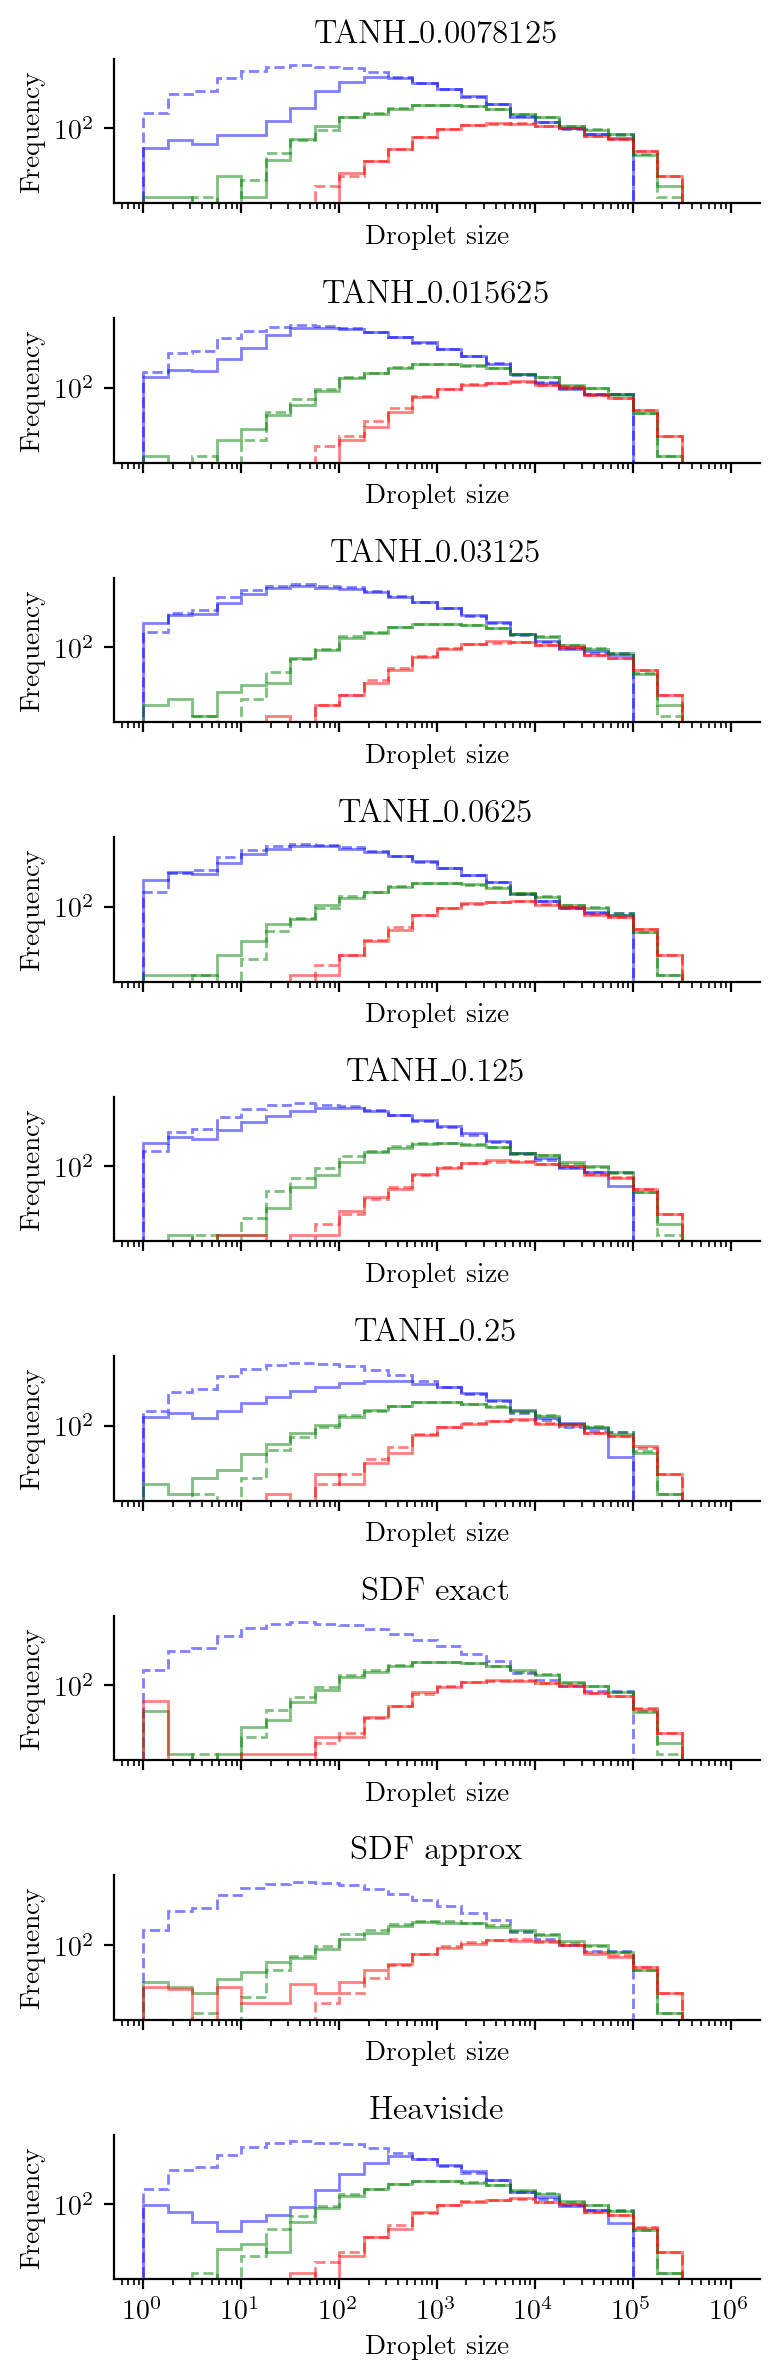

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the droplet PDFs for each label
fig, axs = plt.subplots(len(label_to_mu_data), 1, figsize=(4, 12), dpi=200, sharex=True, sharey=True)

colors = ['b', 'g', 'r']
num_bins = 25

for i, (label, mu_data) in enumerate(label_to_mu_data.items()):
    for j, mu in enumerate(mus):
        data = mu_data[mu]
        print(label, mu, len(data['gt']), len(data['pred']))
        min_bin = 1
        max_bin = 1e6
        bins = np.logspace(np.log10(min_bin), np.log10(max_bin), num_bins)

        axs[i].hist(data['gt'], bins=bins, alpha=0.5, label=f'GT mu={mu}', histtype='step', color=colors[j])
        axs[i].hist(data['pred'], bins=bins, alpha=0.5, label=f'Pred mu={mu}', histtype='step', linestyle='dashed', color=colors[j])
        axs[i].set_title(f'{label}')
        axs[i].set_xlabel('Droplet size')
        axs[i].set_ylabel('Frequency')
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].set_yscale('log')
        axs[i].set_xscale('log')

plt.tight_layout()
plt.show()

In [66]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from scipy import ndimage

def compute_surface_area_density(phi):
    # Assume phi represents a volume fraction
    dx = 1 / phi.shape[-1]
    grad_phi = np.gradient(phi, dx)  # List of (64, 64, 64) arrays
    abs_grad_phi = np.sqrt(np.sum([g**2 for g in grad_phi], axis=0))
    surface_area = np.sum(abs_grad_phi)
    volume = np.sum(phi)
    return surface_area / volume

def compute_num_components(phi):
    labeled_arr, num_labels = ndimage.label(phi)
    return num_labels

def compute_volume_fraction(phi):
    return np.sum(phi) / phi.size

plot_label_to_mu_to_sigmas = {label: {mu: [] for mu in mus} for label in label_to_mu_data}
plot_label_to_mu_to_dices = {label: {mu: [] for mu in mus} for label in label_to_mu_data}
plot_label_to_mu_to_num_components = {label: {mu: [] for mu in mus} for label in label_to_mu_data}
plot_label_to_mu_to_volume_fraction = {label: {mu: [] for mu in mus} for label in label_to_mu_data}

for outdir, params in outdir_to_params.items():
    gts = outdir_to_metrics[outdir]['gts']
    interfacetype = params['interface_type']
    plot_label = get_label(interfacetype, params['epsilon'])
    mu = params['mu']
    dice_scores = outdir_to_metrics[outdir]['Dice']
    
    assert len(gts) == len(dice_scores)

    for gt in gts:
        phi = get_phi_sharp(gt, interfacetype)
        sigma = compute_surface_area_density(phi)
        vol_frac = compute_volume_fraction(phi)
        num_components = compute_num_components(phi)
        plot_label_to_mu_to_sigmas[plot_label][mu].append(sigma)
        plot_label_to_mu_to_num_components[plot_label][mu].append(num_components)
        plot_label_to_mu_to_volume_fraction[plot_label][mu].append(vol_frac)
        
    for dice in dice_scores:
        plot_label_to_mu_to_dices[plot_label][mu].append(dice)
        

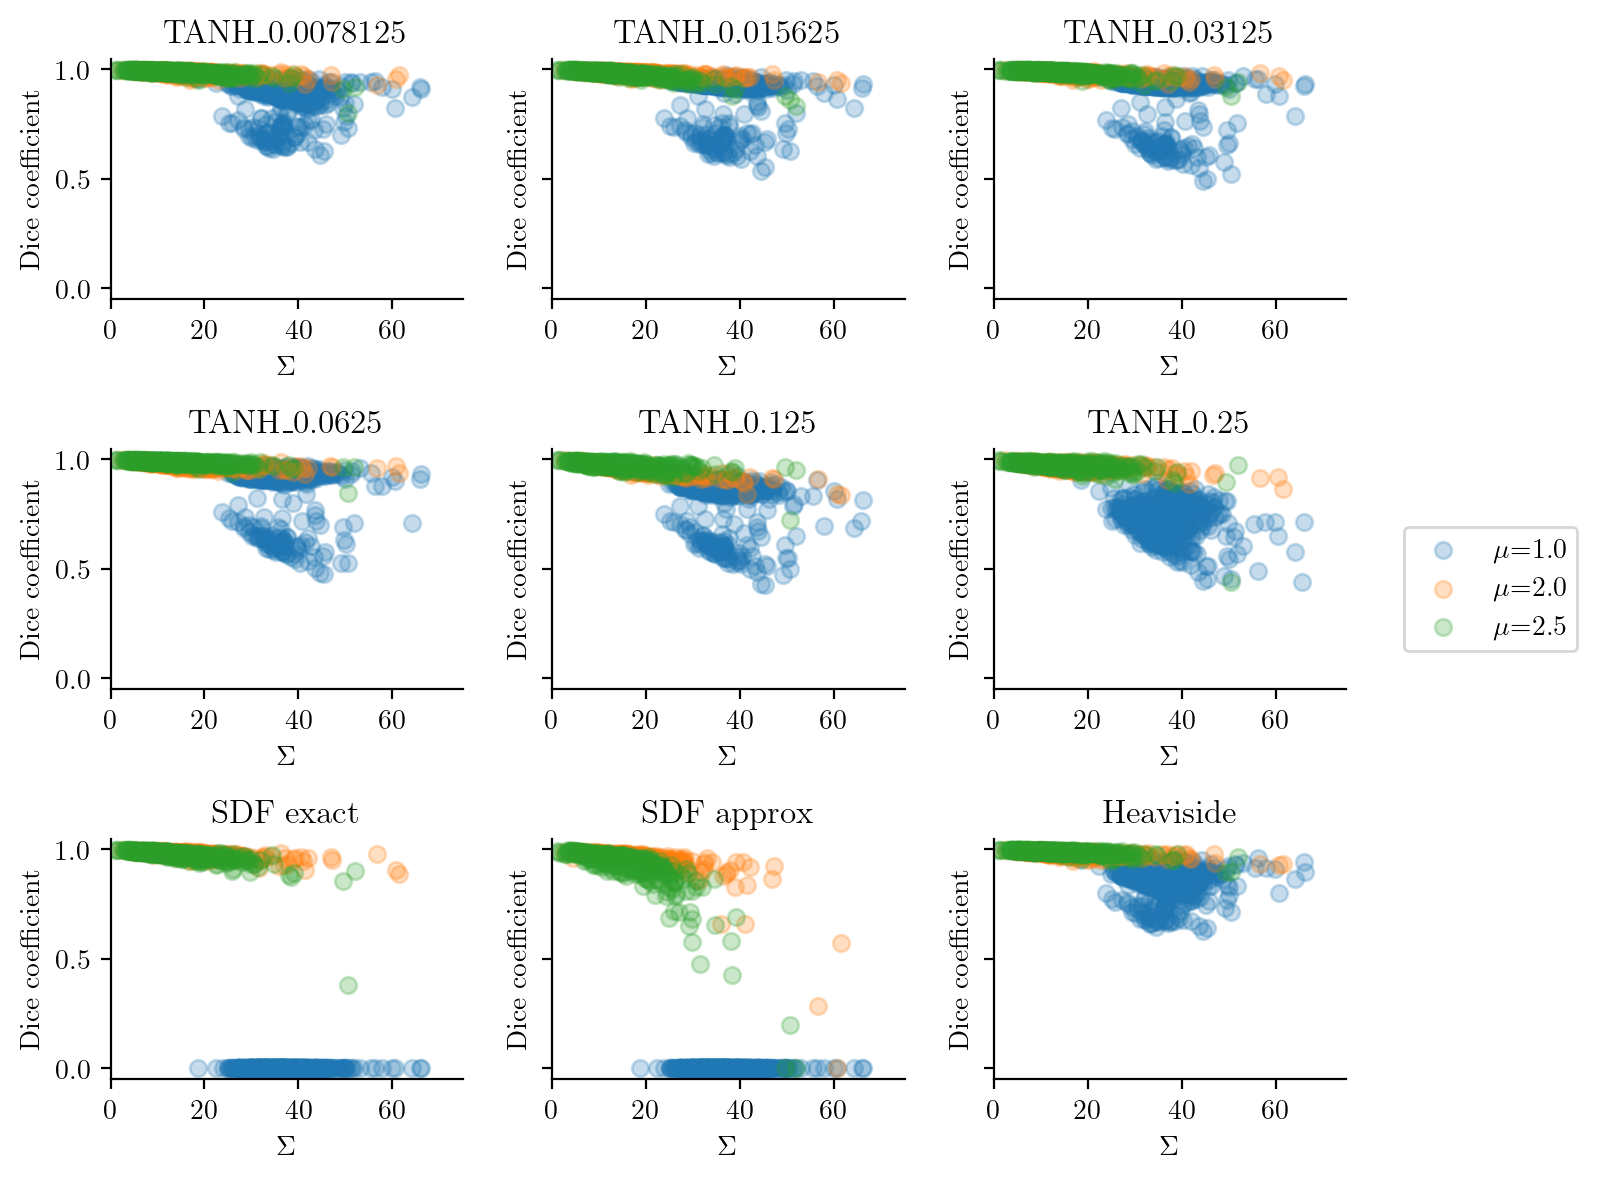

In [82]:

# Scatter plot of sigma vs dice coefficient
fig, axs = plt.subplots(3, 3, figsize=(7, 6), sharey=True, dpi=200)
axs = axs.flatten()  # Flatten the 3x3 array to make indexing easier

for i, label in enumerate(plot_label_to_mu_to_sigmas):
    mu_to_sigmas = plot_label_to_mu_to_sigmas[label]
    mu_to_dices = plot_label_to_mu_to_dices[label]

    for mu, sigma in mu_to_sigmas.items():
        dice_scores = mu_to_dices[mu]
        axs[i].scatter(sigma, dice_scores, alpha=0.25, label=f'$\\mu$={mu}')

    axs[i].set_title(label)
    axs[i].set_xlabel('$\\Sigma$')
    axs[i].set_ylabel('Dice coefficient')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xlim(0, 75)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Add a custom legend outside the plot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

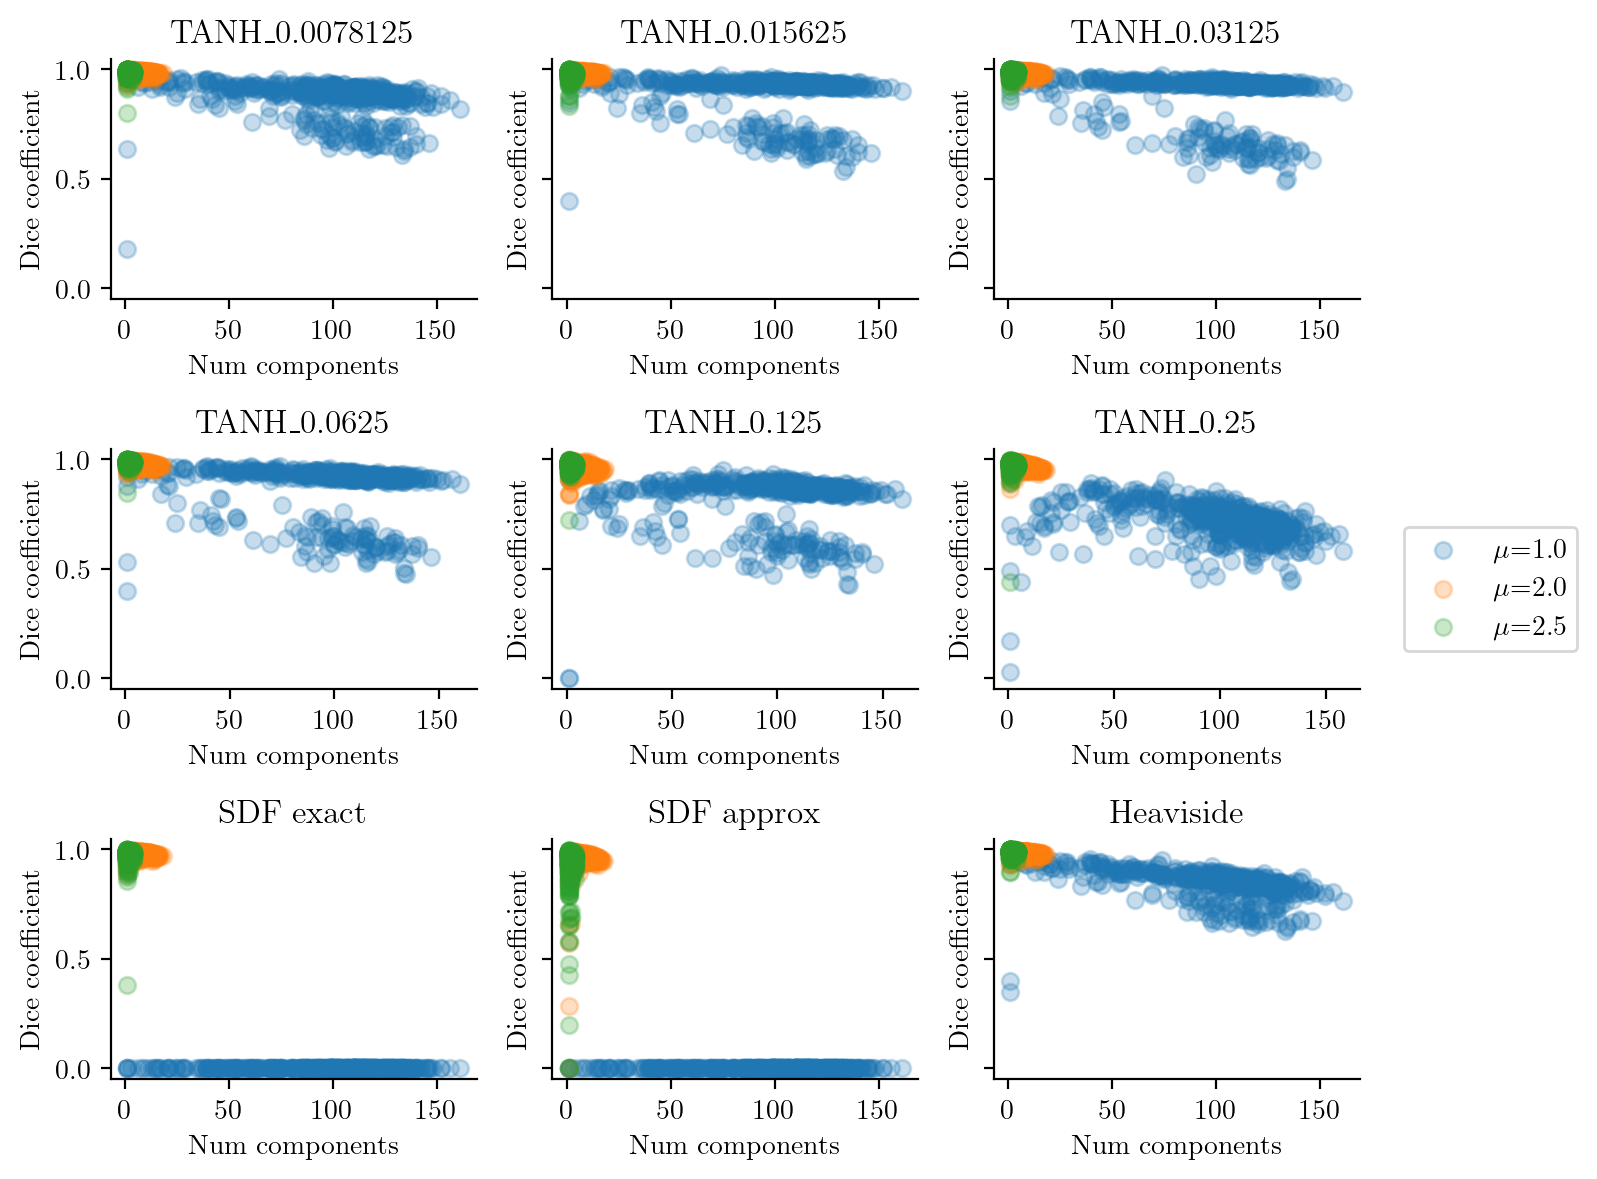

In [80]:
# Scatter plot of num_components vs dice coefficient

fig, axs = plt.subplots(3, 3, figsize=(7, 6), sharey=True, dpi=200)
axs = axs.flatten()  # Flatten the 3x3 array to make indexing easier

for i, label in enumerate(plot_label_to_mu_to_num_components):
    mu_to_num_components = plot_label_to_mu_to_num_components[label]
    mu_to_dices = plot_label_to_mu_to_dices[label]

    for mu, num_components in mu_to_num_components.items():
        dice_scores = mu_to_dices[mu]
        axs[i].scatter(num_components, dice_scores, alpha=0.25, label=f'$\\mu$={mu}')

    axs[i].set_title(label)
    axs[i].set_xlabel('Num components')
    axs[i].set_ylabel('Dice coefficient')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
    
# Add a custom legend outside the plot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

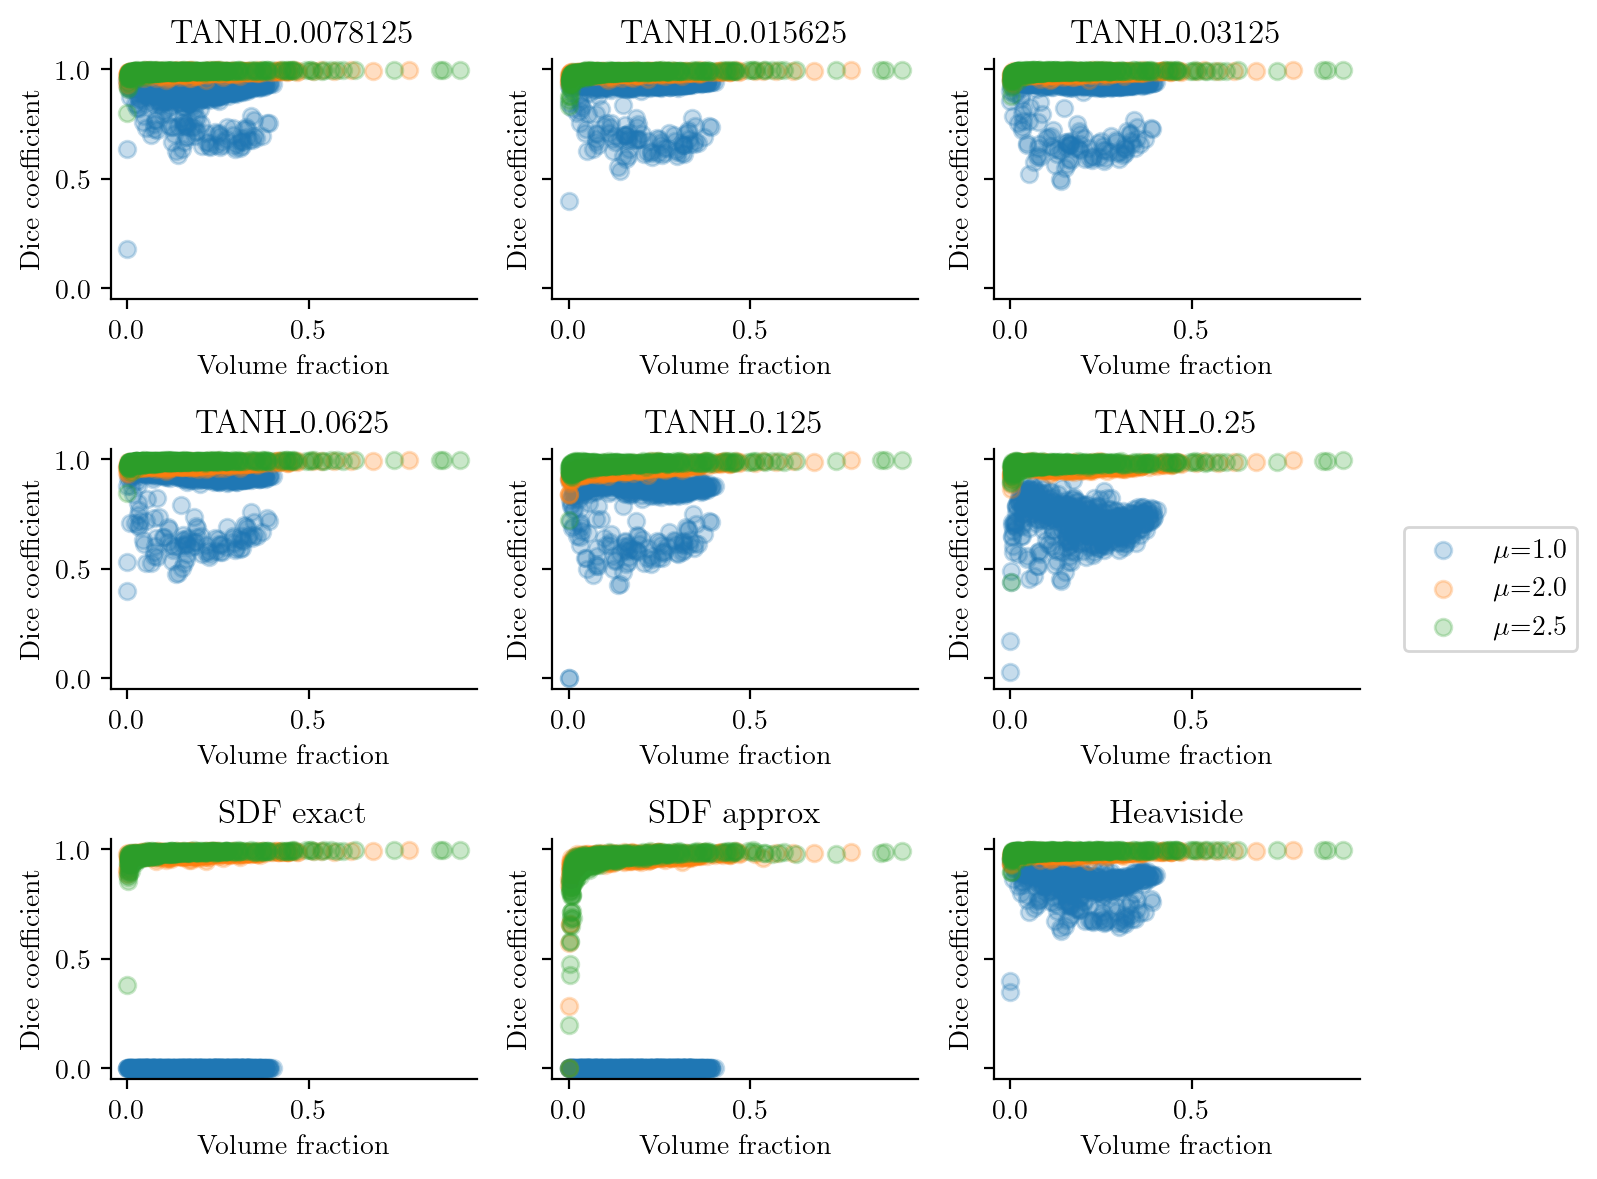

In [69]:
# Scatter plot of num_components vs dice coefficient

fig, axs = plt.subplots(3, 3, figsize=(7, 6), sharey=True, dpi=200)
axs = axs.flatten()  # Flatten the 3x3 array to make indexing easier

for i, label in enumerate(plot_label_to_mu_to_volume_fraction):
    mu_to_volfrac = plot_label_to_mu_to_volume_fraction[label]
    mu_to_dices = plot_label_to_mu_to_dices[label]

    for mu, num_components in mu_to_volfrac.items():
        dice_scores = mu_to_dices[mu]
        axs[i].scatter(num_components, dice_scores, alpha=0.25, label=f'$\\mu$={mu}')

    axs[i].set_title(label)
    axs[i].set_xlabel('Volume fraction')
    axs[i].set_ylabel('Dice coefficient')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Add a custom legend outside the plot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


Dice: 0.9830520022483776, Vol frac: 0.22523117065429688, Sigma: 14.881316184997559, Num components: 9


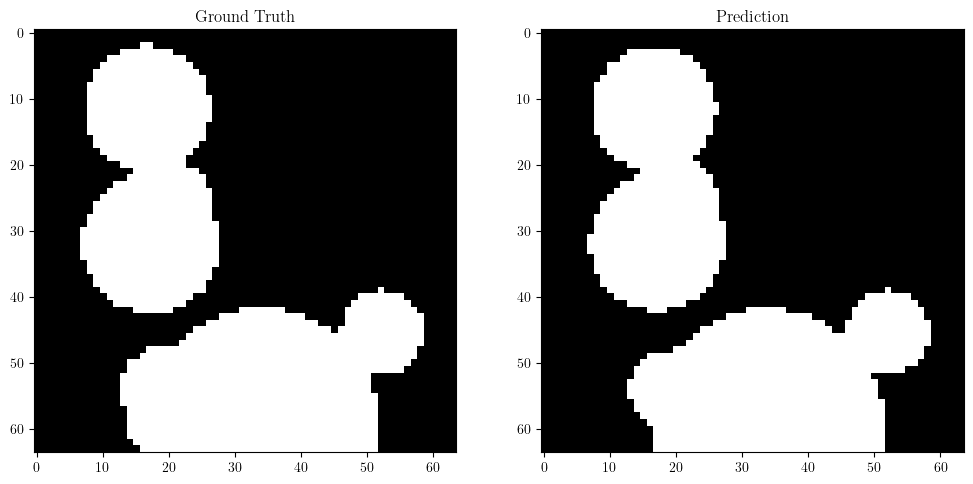

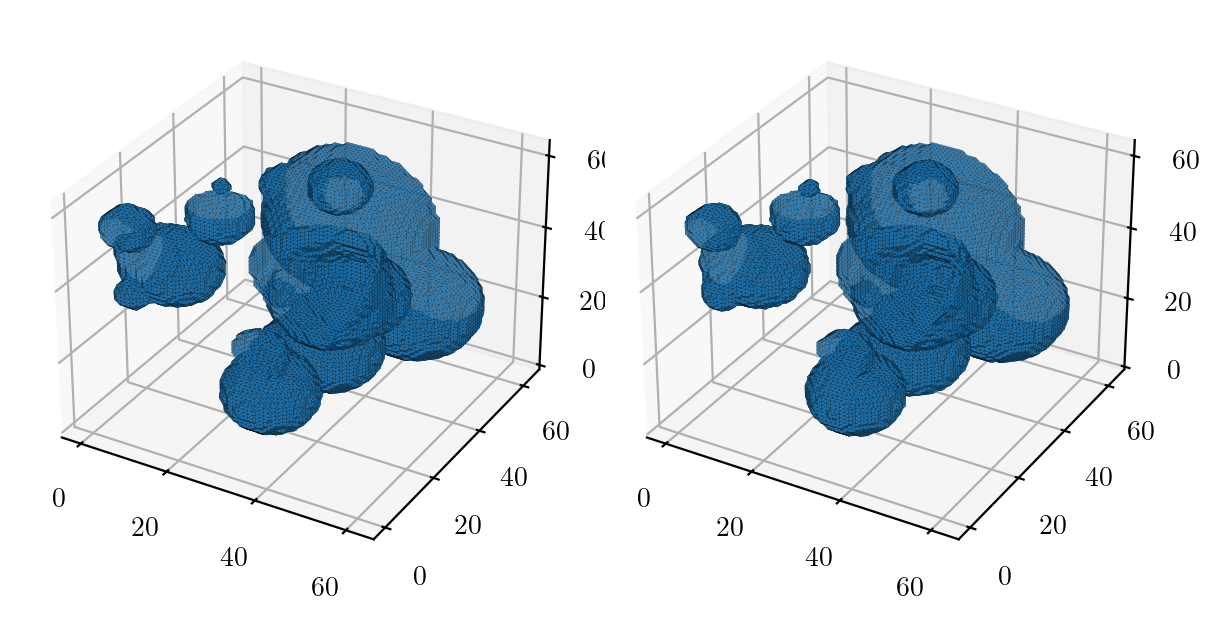

In [83]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import skimage

def visualize_gt_pred(interface_type, mu, epsilon, sample_index):
    for outdir, params in outdir_to_params.items():
        if params['interface_type'] == interface_type and params['mu'] == mu and params['epsilon'] == epsilon:
            
            data = np.load(outdir / 'inference.npz')
            gts = data['gts']
            preds = data['preds']
            
            gt = gts[sample_index]
            pred = preds[sample_index]
            
            gt = get_phi_sharp(gt, interface_type)
            pred = get_phi_sharp(pred, interface_type)
            
            dice = dice_coefficient(gt, pred)
            vol_frac = compute_volume_fraction(gt)
            sigma = compute_surface_area_density(gt)
            num_components = compute_num_components(gt)
            
            print(f'Dice: {dice}, Vol frac: {vol_frac}, Sigma: {sigma}, Num components: {num_components}')
            
            fig, axs = plt.subplots(1, 2, figsize=(12, 6))
            axs[0].imshow(gt[gt.shape[0] // 2], cmap='gray')
            axs[0].set_title('Ground Truth')
            axs[1].imshow(pred[pred.shape[0] // 2], cmap='gray')
            axs[1].set_title('Prediction')
            plt.show()



            fig = plt.figure(figsize=(6, 6), dpi=200)
            ax = fig.add_subplot(121, projection="3d")
            verts, faces, normals, values = skimage.measure.marching_cubes(
                gt, 0.5, spacing=(1, 1, 1), allow_degenerate=False, method='lewiner'
            )
            mesh = Poly3DCollection(verts[faces])
            mesh.set_edgecolor("k")
            mesh.set_linewidth(0.05)
            mesh.set_alpha(0.9)
            ax.add_collection3d(mesh)
            
            ax = fig.add_subplot(122, projection="3d")
            verts, faces, normals, values = skimage.measure.marching_cubes(
                pred, 0.5, spacing=(1, 1, 1), allow_degenerate=False, method='lewiner'
            )
            mesh = Poly3DCollection(verts[faces])
            mesh.set_edgecolor("k")
            mesh.set_linewidth(0.05)
            mesh.set_alpha(0.9)
            ax.add_collection3d(mesh)

            plt.tight_layout()
            break

# Example usage
visualize_gt_pred(InterfaceType.TANH_EPSILON, 2.0, 1/32, 0)

In [76]:
def find_samples_in_volume_fraction_window(interface_type, mu, epsilon, volume_fraction_min, volume_fraction_max):
    sample_indices = []
    
    for outdir, params in outdir_to_params.items():
        if params['interface_type'] == interface_type and params['mu'] == mu and params['epsilon'] == epsilon:
            data = np.load(outdir / 'inference.npz')
            gts = data['gts']
            preds = data['preds']
            
            for i, gt, pred in zip(range(len(gts)), gts, preds):
                gt = get_phi_sharp(gt, interface_type)
                pred = get_phi_sharp(pred, interface_type)
                dice = dice_coefficient(gt, pred)
                vol_frac = compute_volume_fraction(gt)
                if volume_fraction_min <= vol_frac <= volume_fraction_max:
                    sample_indices.append((i, dice))
            
    return sample_indices

# Example usage
sample_indices = find_samples_in_volume_fraction_window(InterfaceType.TANH_EPSILON, 1.0, 1/32, 0.25, 0.26)
print(sample_indices)

[(9, 0.9182931217984548), (11, 0.9225262934400995), (42, 0.5818487319316196), (77, 0.9281436233611442), (85, 0.9385880149255951), (124, 0.9389840114544804), (148, 0.9315885198517814), (201, 0.9657686585850849), (226, 0.6327247884009565), (332, 0.9152557814659034), (335, 0.9342239709627732), (363, 0.6488896964741333), (437, 0.9285698293168945), (442, 0.9144584230609392), (484, 0.9229367770777674)]


Dice: 0.9225262934400995, Vol frac: 0.2529258728027344, Sigma: 38.295623779296875, Num components: 151


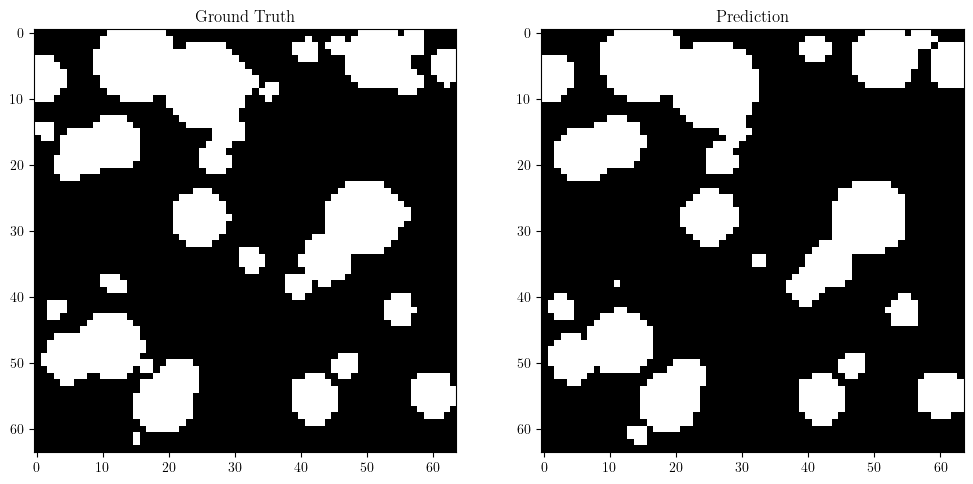

Dice: 0.5818487319316196, Vol frac: 0.25701904296875, Sigma: 37.010704040527344, Num components: 130


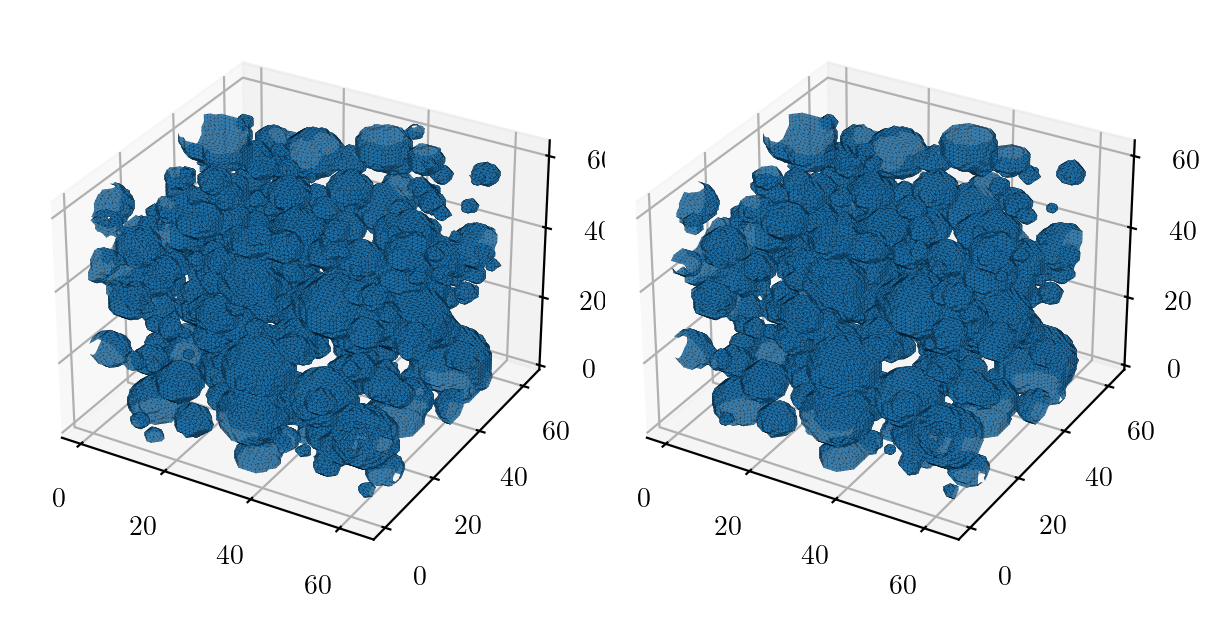

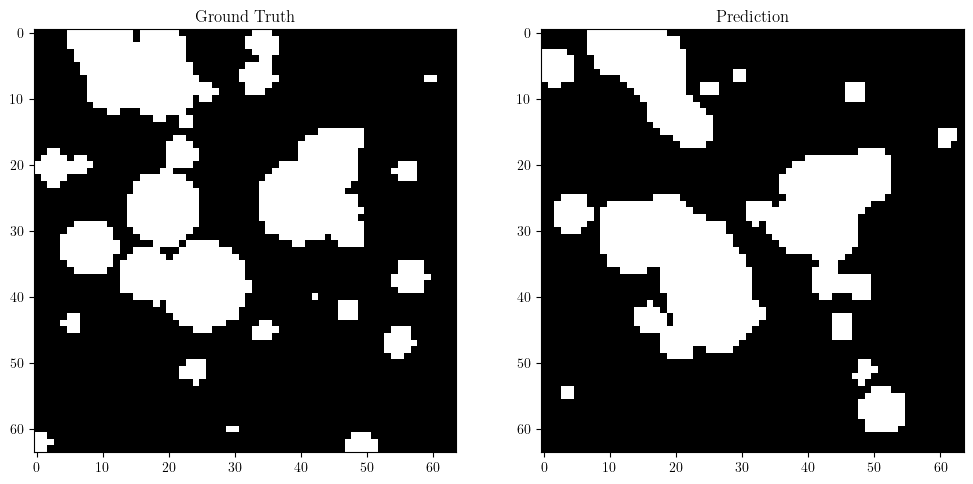

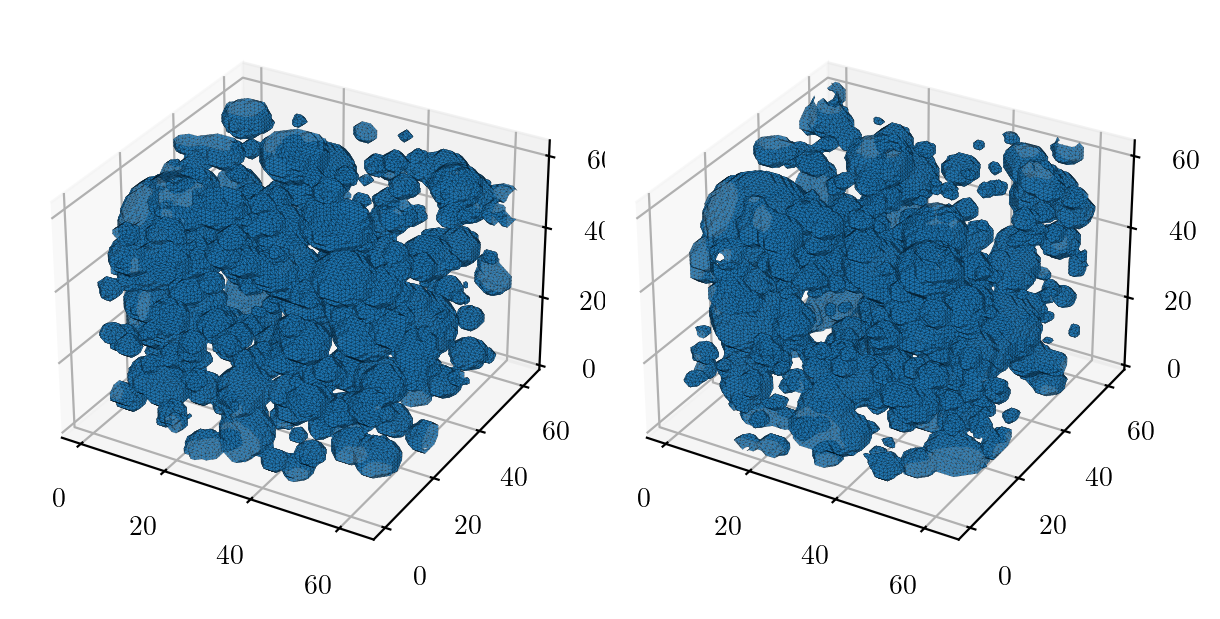

In [79]:
# Visualise a good and bad sample with same volume fraction

visualize_gt_pred(InterfaceType.TANH_EPSILON, 1.0, 1/32, 11)
visualize_gt_pred(InterfaceType.TANH_EPSILON, 1.0, 1/32, 42)

# Summary

 - 

# Next steps

  - 